# VVV Machine Analysis Samples size 2.5k
## All no RRLyrae as 0

In [1]:
% matplotlib inline

import time
import pandas as pd

import numpy as np

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, real_vs_predicted,
    discretize_classes, clean_features, union)

## 1. Load Data

In [45]:
start = time.time()

path = "/home/data/carpyncho/stored/samples/"
data = container.read(path)

print("Removing b220...")
del data["b220"]
data, classes, sclasses = discretize_classes(data)
b278 = data.b278
del data

Loading '/home/data/carpyncho/stored/samples/b220_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b262_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b278_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b261_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b264_sample.npy'...
Loading '/home/data/carpyncho/stored/samples/b263_sample.npy'...
Removing b220...


In [46]:
path = "/home/data/carpyncho/stored/samples/color/"
data = container.read(path)
data, classes, sclasses = discretize_classes(data)
b278c = data.b278
del data

Loading '/home/data/carpyncho/stored/samples/color/b261_sample2.5K_color.npy'...
Loading '/home/data/carpyncho/stored/samples/color/b264_sample2.5K_color.npy'...
Loading '/home/data/carpyncho/stored/samples/color/b263_sample2.5K_color.npy'...
Loading '/home/data/carpyncho/stored/samples/color/b262_sample2.5K_color.npy'...
Loading '/home/data/carpyncho/stored/samples/color/b278_sample2.5K_color.npy'...


In [47]:
b278 = b278[b278.scls == 3]
b278c = b278c[b278c.scls == 3]

In [48]:
b278 = b278.sort_values("id")
b278.head()

,id,ogle3_type,cnt,AMP,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,...,Signature_x_9_y_8,Signature_x_9_y_9,Skew,SmallKurtosis,Std,StetsonK,cls,real_cls,scls,real_scls
1,32780000002917,RRLyr-RRab,60,0.477605,0.29050,0.665408,1.0,0.250000,63.744614,2.844697e-01,...,1.050709,0.00000,0.201067,1.660592,0.163322,0.754587,6,6,3,3
14,32780000005228,RRLyr-RRab,114,0.481196,0.14950,0.999970,1.0,0.333333,513.071531,-6.162650e-01,...,0.699430,2.09829,0.380839,-0.589011,0.088693,0.842192,6,6,3,3
29,32780000008400,RRLyr-RRab,57,0.426171,0.27250,0.987942,1.0,0.298246,798.848740,-1.203364e+00,...,0.000000,0.00000,0.407427,-0.522170,0.139123,0.847693,6,6,3,3
31,32780000008729,RRLyr-RRc,103,0.393574,0.12350,0.997455,1.0,0.242718,25.247886,3.789182e-09,...,0.000000,0.00000,0.997445,2.961221,0.066384,0.775038,7,7,3,3
49,32780000011446,RRLyr-RRab,114,0.200970,0.04825,0.999968,1.0,0.280702,3539.333875,5.213432e-01,...,0.000000,0.00000,0.723006,0.711672,0.024222,0.793269,6,6,3,3


In [49]:
b278c = b278c.sort_values("id")
b278c.head()

,id,ogle3_type,cnt,AMP,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,...,c89_jk_color,c89_hk_color,c89_jh_color,n09_jk_color,n09_hk_color,n09_jh_color,cls,real_cls,scls,real_scls
13,32780000002917,RRLyr-RRab,60,0.477605,0.29050,0.665408,1.0,0.250000,63.744614,2.844697e-01,...,0.332137,0.082722,0.249415,0.334011,0.098619,0.235392,6,6,3,3
26,32780000005228,RRLyr-RRab,114,0.481196,0.14950,0.999970,1.0,0.333333,513.071531,-6.162650e-01,...,0.300861,0.041946,0.258915,0.302581,0.057082,0.245498,6,6,3,3
41,32780000008400,RRLyr-RRab,57,0.426171,0.27250,0.987942,1.0,0.298246,798.848740,-1.203364e+00,...,0.183028,0.050644,0.132384,0.184484,0.062195,0.122289,6,6,3,3
43,32780000008729,RRLyr-RRc,103,0.393574,0.12350,0.997455,1.0,0.242718,25.247886,3.789182e-09,...,0.189860,0.049945,0.139915,0.191580,0.065082,0.126499,7,7,3,3
61,32780000011446,RRLyr-RRab,114,0.200970,0.04825,0.999968,1.0,0.280702,3539.333875,5.213432e-01,...,0.571924,0.083458,0.488466,0.574170,0.097874,0.476295,6,6,3,3


In [59]:
set(b278.id).difference(b278c.id)

{32780000029135, 32780000242293, 32780000374945}

In [58]:
diff

set()

In [51]:
# b278  = b278[~b278.id.isin(diff)]

In [55]:
b278c.shape, b278.shape

((424, 288), (424, 282))

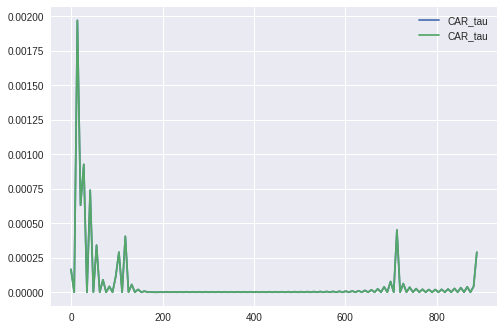

In [68]:
ax = sns.kdeplot(b278c.CAR_tau)
ax = sns.kdeplot(b278.CAR_tau)